In [1]:
import pandas as pd
import os
import analyseCommon as ac

import sys
sys.path.append('../service/')
from common.NMerEncoder import NMerEncoder
from regression.datenProvider import *

file_path = '../data'

filePath = os.path.join(file_path, 'APAfreq.tsv')
data = pd.read_csv(filePath, sep="\t")

# print(data.columns)
# print(len(data[data['chromosome'] == 'chrY']['terminal exon'].unique()))
# print(len(data[data['chromosome'] == 'chr11']['terminal exon'].unique()))


# print(len(data[data['chromosome'] == 'chrY']['cleavage site'].unique()))
# print(len(data[data['chromosome'] == 'chr11']['cleavage site'].unique()))

# data['chromosome'].unique()

In [2]:
import numpy as np
from common.SparseBatchEncoder import SparseBatchEncoder

encoder = NMerEncoder(n_mer_len=6, count_n_mers=True)

#'A', 'C', 'G', 'T'

sparse = SparseBatchEncoder(encoder, sparse_mode='col')

generated_input = np.concatenate([np.expand_dims(encoder(inp), axis=0) for inp in data.iloc[0]['sequence']], axis=0)

print(generated_input)
matrix = sparse('TTTTGC')
print(matrix)
len(matrix.toarray()[0])


[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]



4096

In [3]:
data['library_index'] = 1
data['seq_var_aligned'] = data['sequence']

generator = CreateDataGenerator(data, 0.25)


test = generator['test'][0][0][0]

print(generator['test'])

Set size = 51256
Training set size = 38442
Test set size = 12814


KeyboardInterrupt: 

In [ ]:
# print(test.toarray())
X_df =pd.DataFrame(test.toarray())
X_df[0]

0        22.0
1        22.0
2        22.0
3        22.0
4        22.0
         ... 
12809     0.0
12810     0.0
12811     0.0
12812     0.0
12813     0.0
Name: 0, Length: 12814, dtype: float64

In [ ]:
ac.PrintLenOfDistinct(data, 'cleavage site')
ac.PrintLenOfDistinct(data, 'frequency')

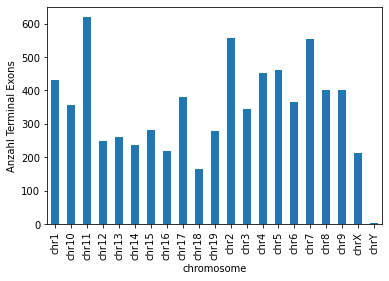

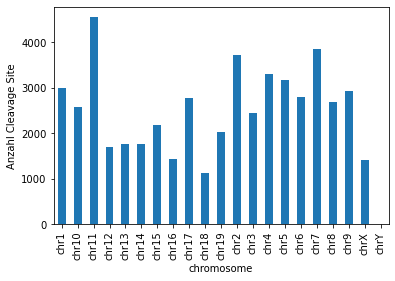

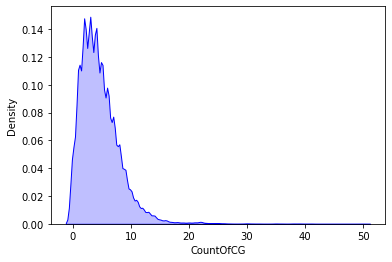

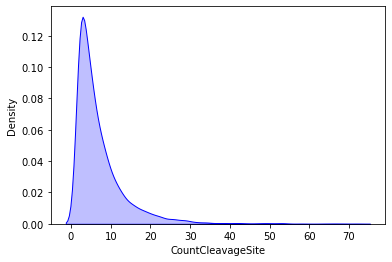

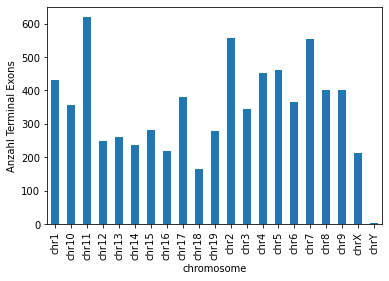

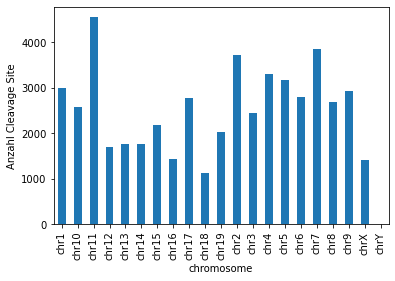

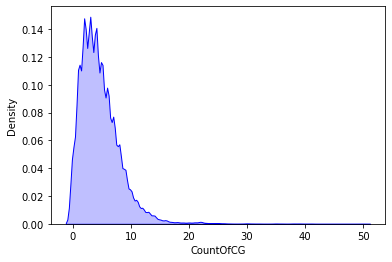

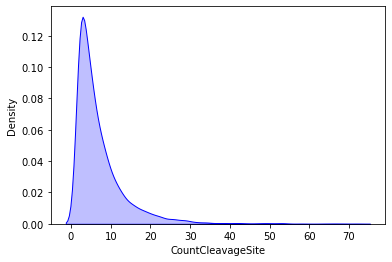

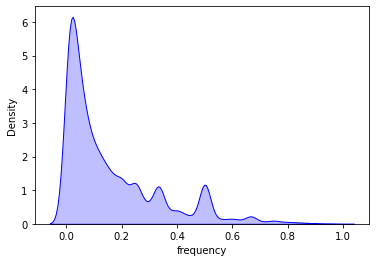

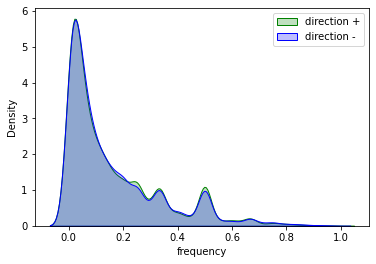

<Figure size 432x288 with 0 Axes>

In [ ]:
ac.PlotAnzahlTerminalExonsByChromosome(data)
ac.PlotAnzahlCleavageSitesByChromosome(data)
ac.AmountOfCGInSequence(data)
ac.CountOfCromosoneFigure(data)

ac.PlotAnzahlTerminalExonsByChromosome(data)
ac.PlotAnzahlCleavageSitesByChromosome(data)
ac.AmountOfCGInSequence(data)
ac.CountOfCromosoneFigure(data)

ac.DencityOfColumnPlot(data, 'frequency')

ac.DencityOfColumnPlotByDirection(data, 'frequency')
